In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1') #read the dataset

In [3]:
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape #checking the shape

(181691, 135)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
columns=df.columns #checking the columns
print("Columns of the dataset:")
print(list(columns))
    

Columns of the dataset:
['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim

In [7]:
len(df[df.duplicated()]) #check whether any duplicates present

0

In [8]:
df.isnull().sum() #checking null values in each columns

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
df.shape

(181691, 135)

In [10]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [11]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']] #drop redundant columns

In [12]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [13]:
df['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

- The above dataset is about terrorism within 1970 to 2017.

In [14]:
df['Country'].value_counts().head(3)

Iraq           24636
Pakistan       14368
Afghanistan    12731
Name: Country, dtype: int64

- Iraq was the most terror attacking country with Pakistan and Afghanistan were second and third most respectively between the years 1970 to 2017.

In [15]:
df['state'].value_counts().head(2)

Baghdad             7645
Northern Ireland    4498
Name: state, dtype: int64

- Baghdad was the state in the preiod 1970-2017.

In [16]:
df['Region'].value_counts().head(2)

Middle East & North Africa    50474
South Asia                    44974
Name: Region, dtype: int64

<Figure size 1440x720 with 0 Axes>

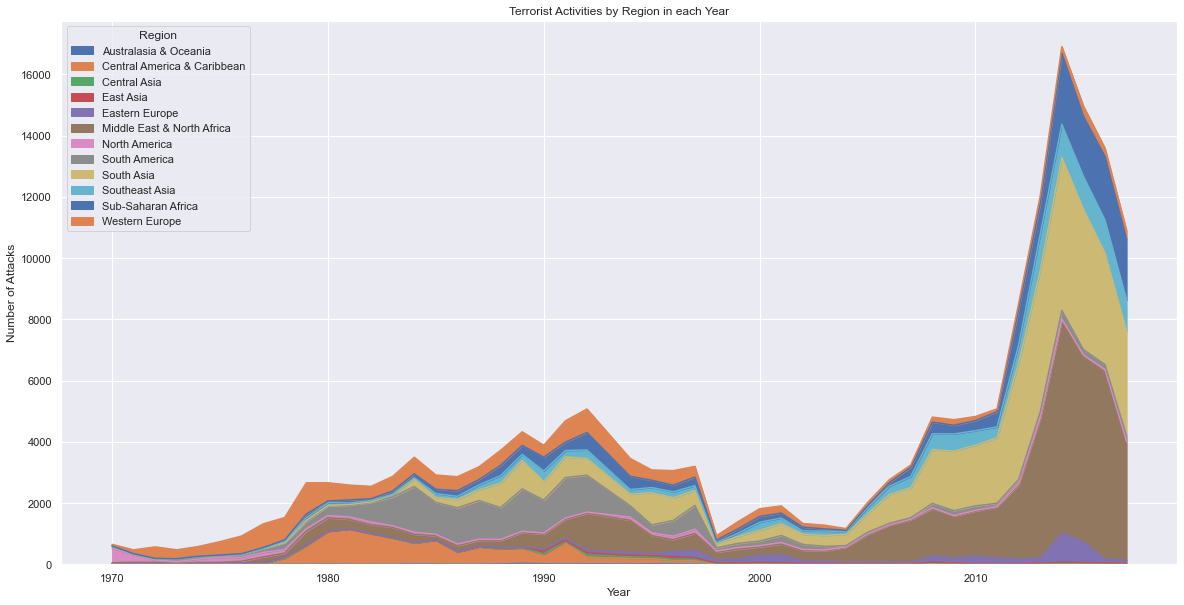

In [41]:
plt.figure(figsize=(20,10)) 
pd.crosstab(df.Year, df.Region).plot(kind='area')
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [18]:
df.describe(include='all')

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
count,181691.000000,181691.000000,181691.000000,181691,181270,181691,181257,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,181055,115562,181691,181691,181691,50561
unique,NaN,NaN,NaN,205,2855,12,36674,NaN,NaN,9,NaN,NaN,86006,112492,3537,22,12,14490
top,NaN,NaN,NaN,Iraq,Baghdad,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,Civilians,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown
freq,NaN,NaN,NaN,24636,7645,50474,9775,NaN,NaN,88255,NaN,NaN,6461,100,82782,43511,92426,14889
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,2.403272,3.167668,NaN,NaN,NaN,NaN,NaN,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,11.545741,35.949392,NaN,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

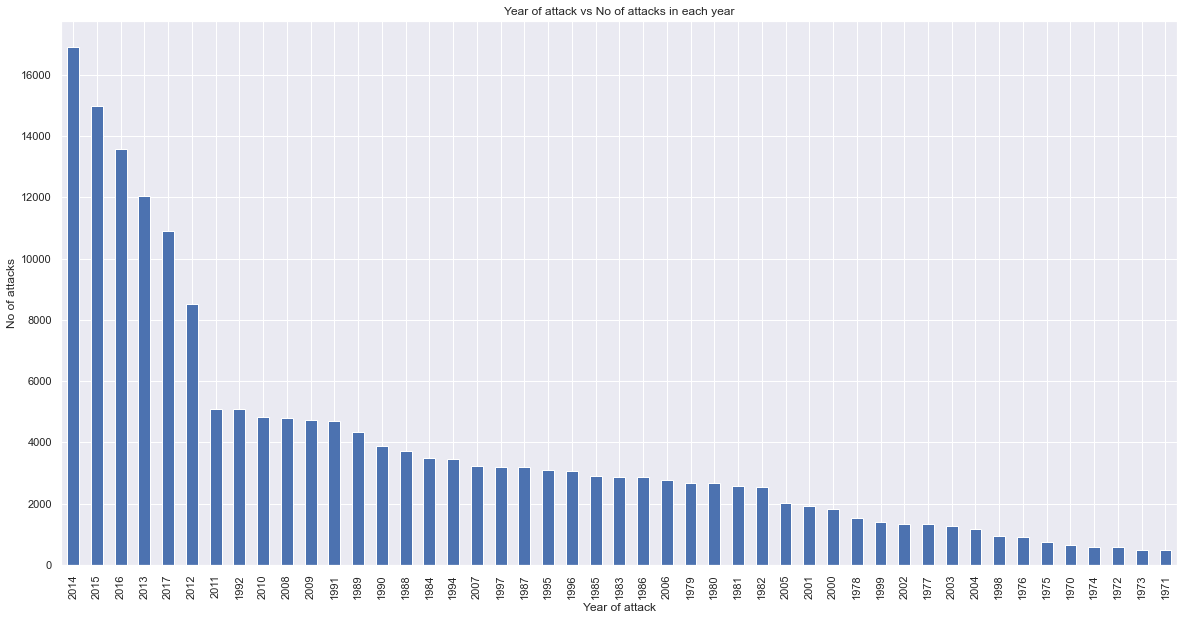

In [20]:
sns.set(rc={'figure.figsize':(20,10)})
df['Year'].value_counts().plot.bar()
plt.xlabel('Year of attack')
plt.ylabel('No of attacks')
plt.title('Year of attack vs No of attacks in each year')
plt.show()

- From the above it's clear that 2014 is the year when most of the terror attack happend.

In [21]:
list(df.columns)

['Year',
 'Month',
 'Day',
 'Country',
 'state',
 'Region',
 'city',
 'latitude',
 'longitude',
 'AttackType',
 'Killed',
 'Wounded',
 'Target',
 'Summary',
 'Group',
 'Target_type',
 'Weapon_type',
 'Motive']

In [22]:
df['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

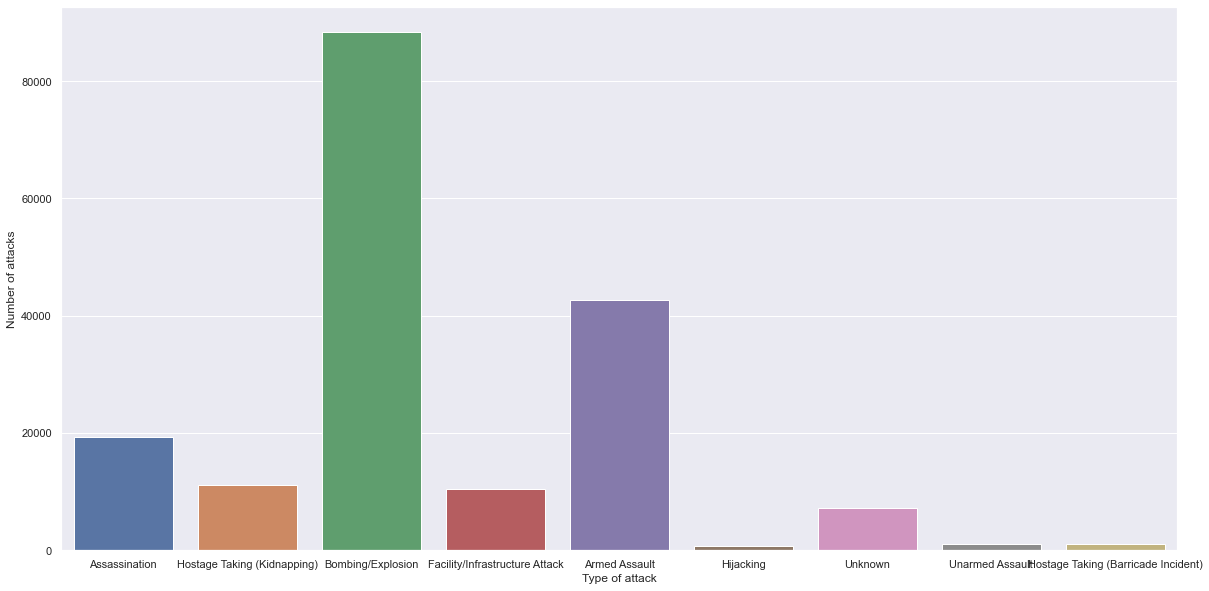

In [23]:
sns.countplot(data=df,x='AttackType')
plt.xlabel('Type of attack')
plt.ylabel('Number of attacks')
plt.show()

- Most of the terror attack happens through Bombing/Explosion.

In [24]:
df['Year'].value_counts().head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

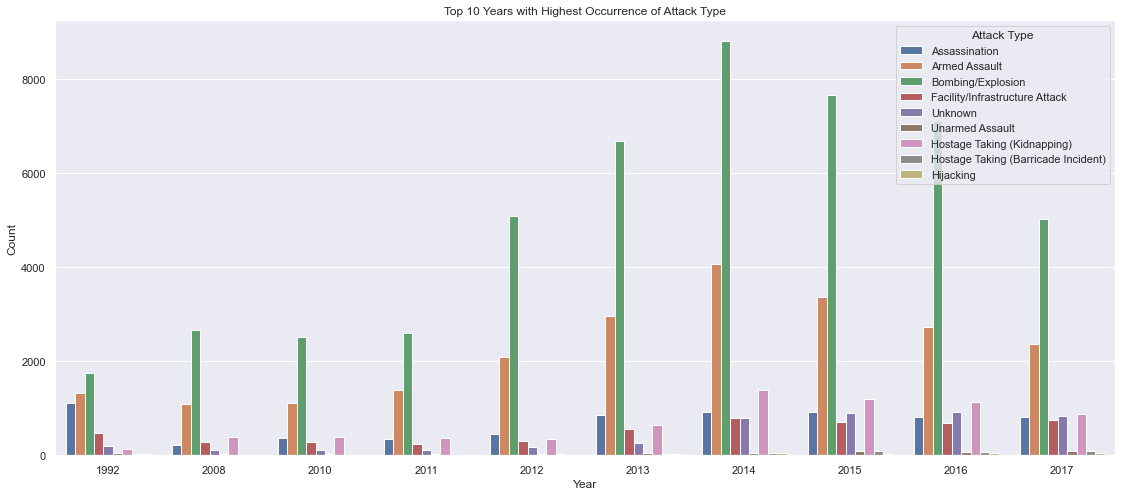

In [25]:
top_10_years = df['Year'].value_counts().head(10).index.tolist()

df1 = df[df['Year'].isin(top_10_years)]
plt.figure(figsize=(19, 8)) 
sns.countplot(data=df1, x='Year', hue='AttackType')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top 10 Years with Highest Occurrence of Attack Type')
plt.legend(title='Attack Type', loc='upper right')

plt.show()


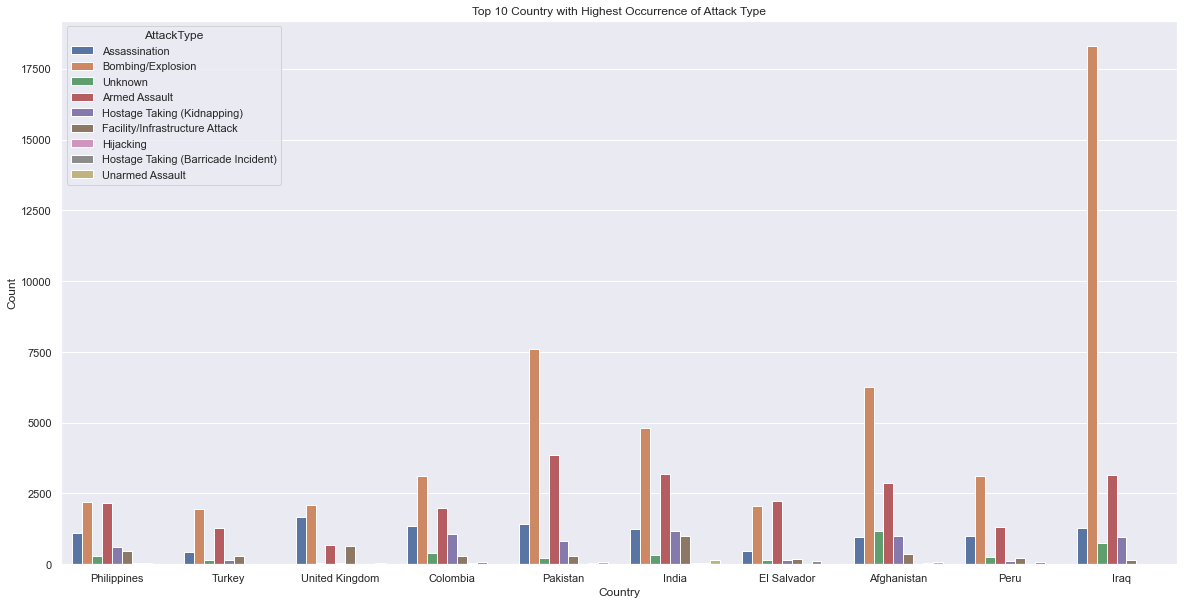

In [26]:
top_10_country=df['Country'].value_counts().head(10).index.tolist()
df2=df[df['Country'].isin(top_10_country)]

sns.countplot(data=df2,x='Country',hue='AttackType')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Country with Highest Occurrence of Attack Type')
plt.show()

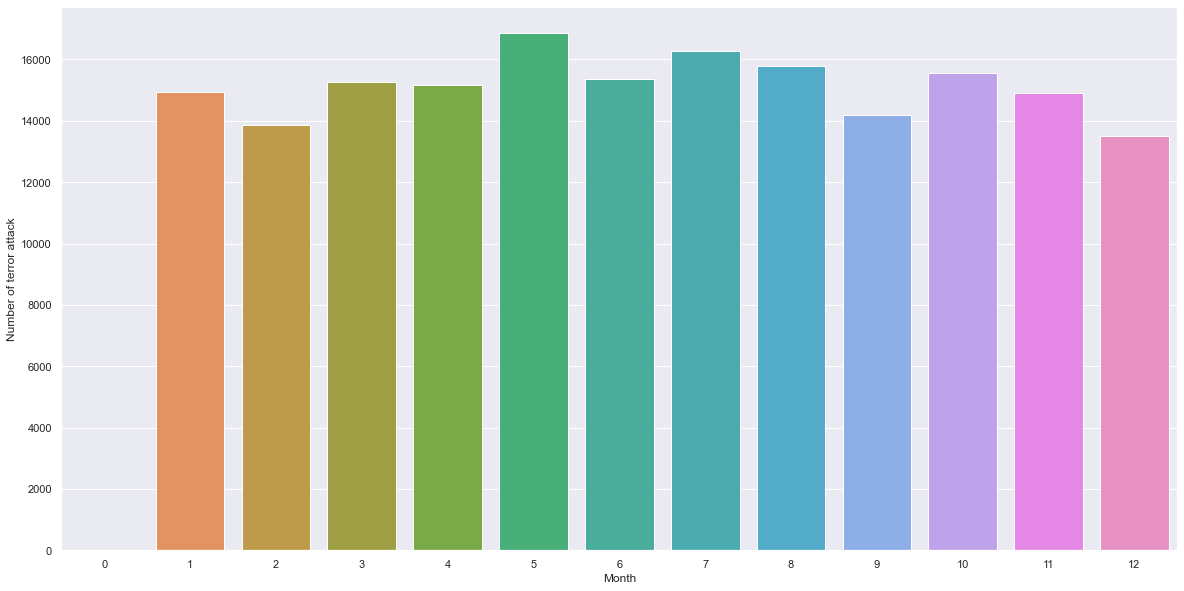

In [27]:
sns.countplot(data=df,x='Month')
plt.xlabel('Month')
plt.ylabel('Number of terror attack')
plt.show()

- So most terror attack happend in the 5th month of the year.

In [28]:
killed_by_year = df.groupby('Year')['Killed'].sum().sort_values(ascending=False)
print(killed_by_year)

Year
2014    44490.0
2015    38853.0
2016    34871.0
2017    26445.0
2013    22273.0
2012    15497.0
2007    12824.0
1997    10924.0
1984    10450.0
1992     9742.0
1983     9444.0
2006     9380.0
2009     9273.0
2008     9157.0
1991     8429.0
2011     8246.0
1989     8152.0
2010     7827.0
2001     7729.0
1994     7690.0
1988     7208.0
1990     7148.0
1985     7094.0
1996     6966.0
1987     6482.0
2005     6331.0
1995     6103.0
2004     5743.0
1982     5136.0
1986     4976.0
1981     4851.0
2002     4805.0
1998     4688.0
2000     4403.0
1980     4400.0
1999     3393.0
2003     3317.0
1979     2100.0
1978     1459.0
1976      674.0
1975      617.0
1972      566.0
1974      539.0
1977      456.0
1973      370.0
1970      174.0
1971      173.0
Name: Killed, dtype: float64


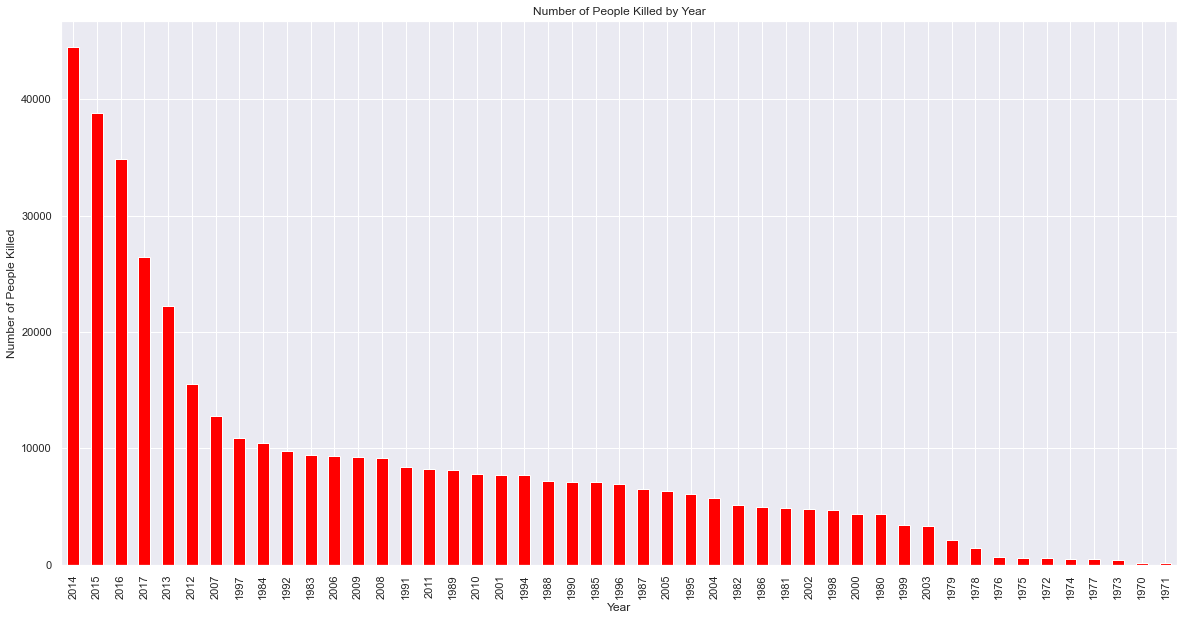

In [29]:
killed_by_year.plot(kind='bar', color='red')
plt.xlabel('Year')
plt.ylabel('Number of People Killed')
plt.title('Number of People Killed by Year')
plt.show()

- 2014 was the year most of the are killed due to terror attack.

In [30]:
killed_by_country = df.groupby('Country')['Killed'].sum().sort_values(ascending=False).head(20)
print(killed_by_country)

Country
Iraq                                78589.0
Afghanistan                         39384.0
Pakistan                            23822.0
Nigeria                             22682.0
India                               19341.0
Sri Lanka                           15530.0
Syria                               15229.0
Colombia                            14698.0
Peru                                12771.0
El Salvador                         12053.0
Algeria                             11066.0
Nicaragua                           10598.0
Somalia                             10273.0
Philippines                          9559.0
Yemen                                8776.0
Turkey                               6888.0
Guatemala                            5167.0
Russia                               4308.0
Burundi                              4205.0
Democratic Republic of the Congo     4069.0
Name: Killed, dtype: float64


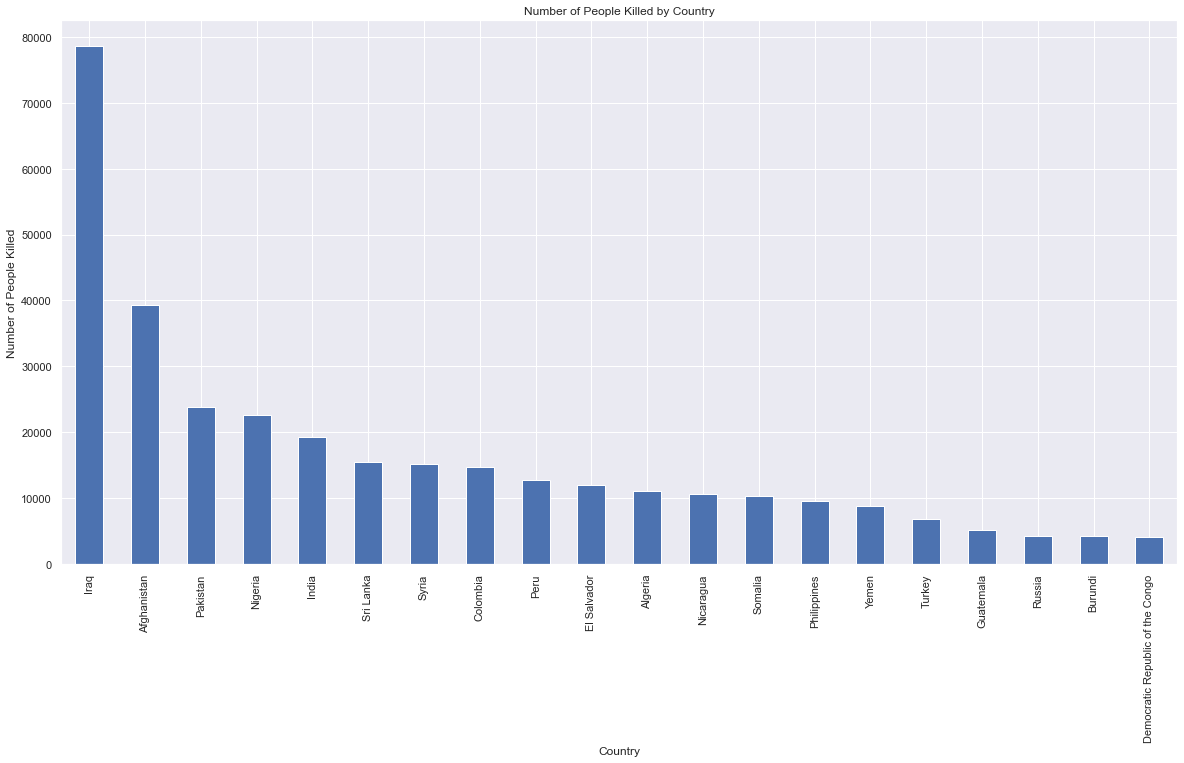

In [31]:
killed_by_country.plot(kind='bar',color='b')
plt.xlabel('Country')
plt.ylabel('Number of People Killed')
plt.title('Number of People Killed by Country')
plt.show()

- Iraq is the country where most number of people killed due to terror attack.

In [32]:
wounded_by_country = df.groupby('Country')['Wounded'].sum().sort_values(ascending=False).head(20)
print(wounded_by_country)

Country
Iraq             134690.0
Afghanistan       44277.0
Pakistan          42038.0
India             28980.0
United States     20702.0
Sri Lanka         15561.0
Syria             14109.0
Philippines       13367.0
Lebanon           10904.0
Colombia          10328.0
Nigeria           10239.0
Turkey             9899.0
Yemen              9328.0
Algeria            9150.0
Somalia            8875.0
Bangladesh         8225.0
Israel             7946.0
Thailand           7818.0
Russia             7441.0
Japan              6998.0
Name: Wounded, dtype: float64


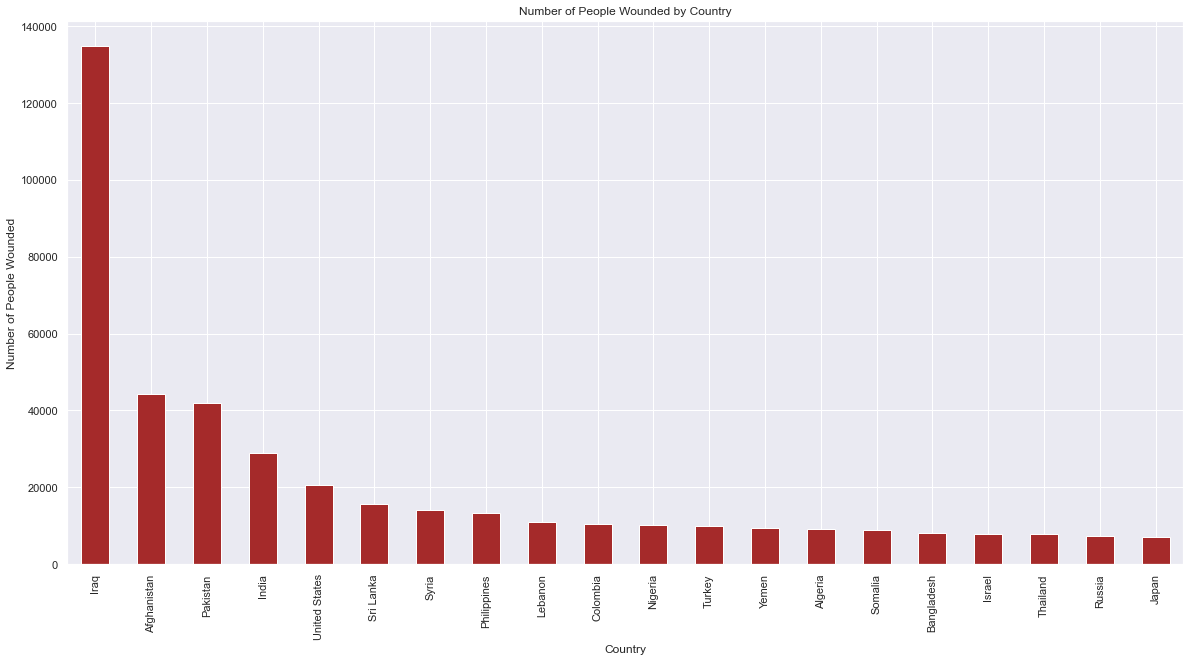

In [33]:
wounded_by_country.plot(kind='bar',color='brown')
plt.xlabel('Country')
plt.ylabel('Number of People Wounded')
plt.title('Number of People Wounded by Country')
plt.show()

- Most number of people also wounded in Iraq.

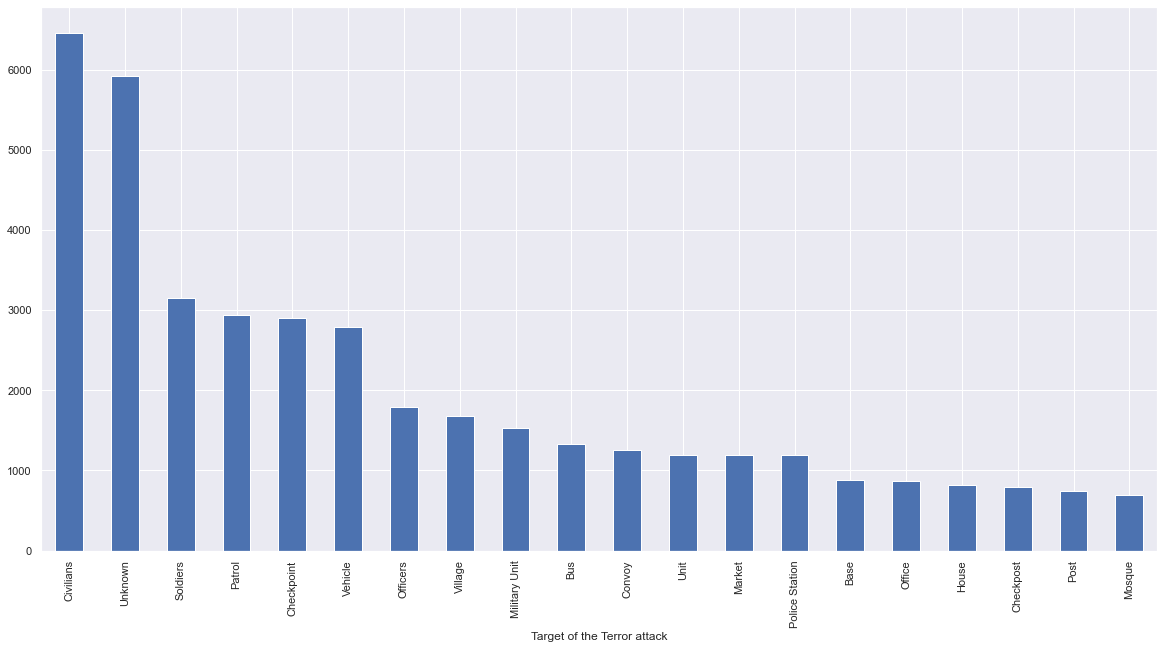

In [34]:
df['Target'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Target of the Terror attack')
plt.show()

- It seems that Taliban group is involved in many terror attacks with many groups are still unknown.

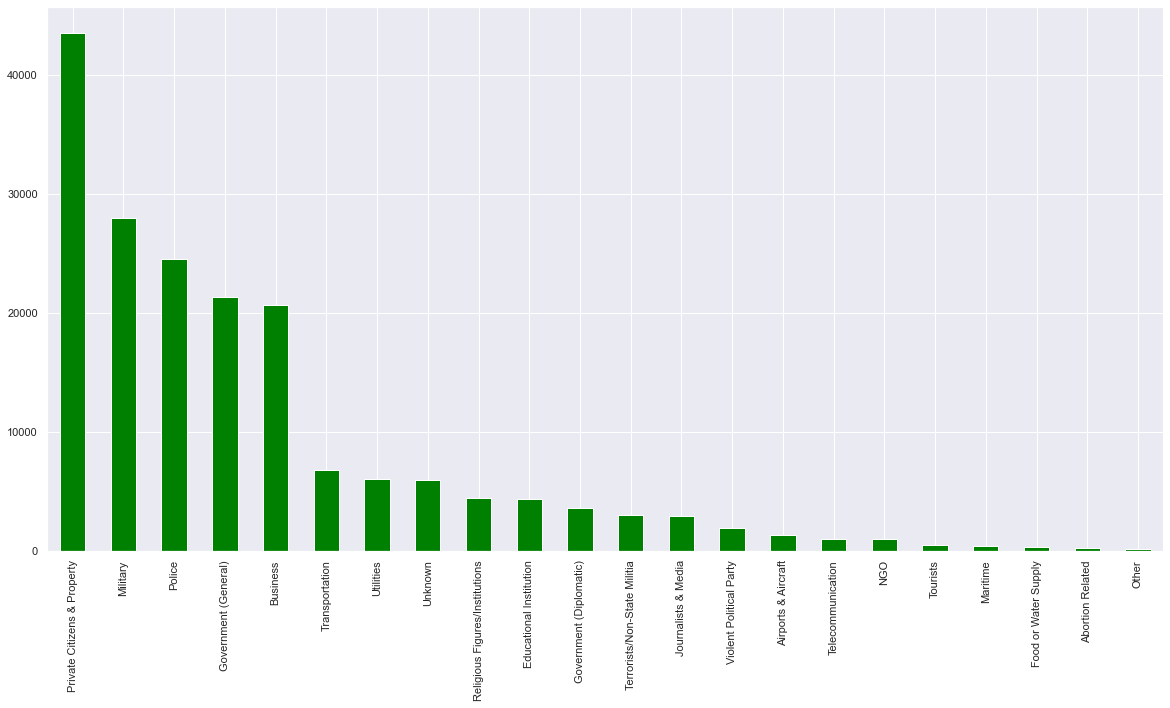

In [35]:
df['Target_type'].value_counts().plot.bar(color='green')
plt.show()

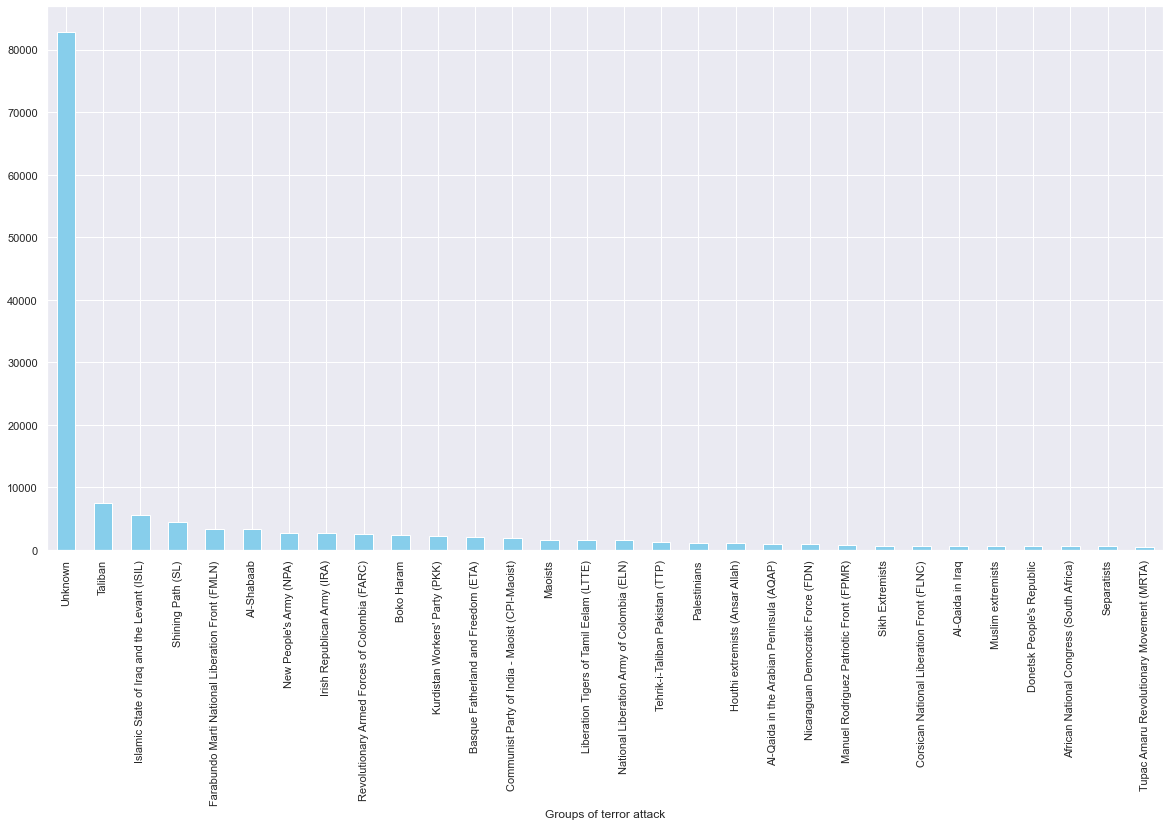

In [36]:
df['Group'].value_counts().head(30).plot(kind='bar',color='skyblue')
plt.xlabel('Groups of terror attack')
plt.show()

In [37]:
df['Weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

<AxesSubplot:>

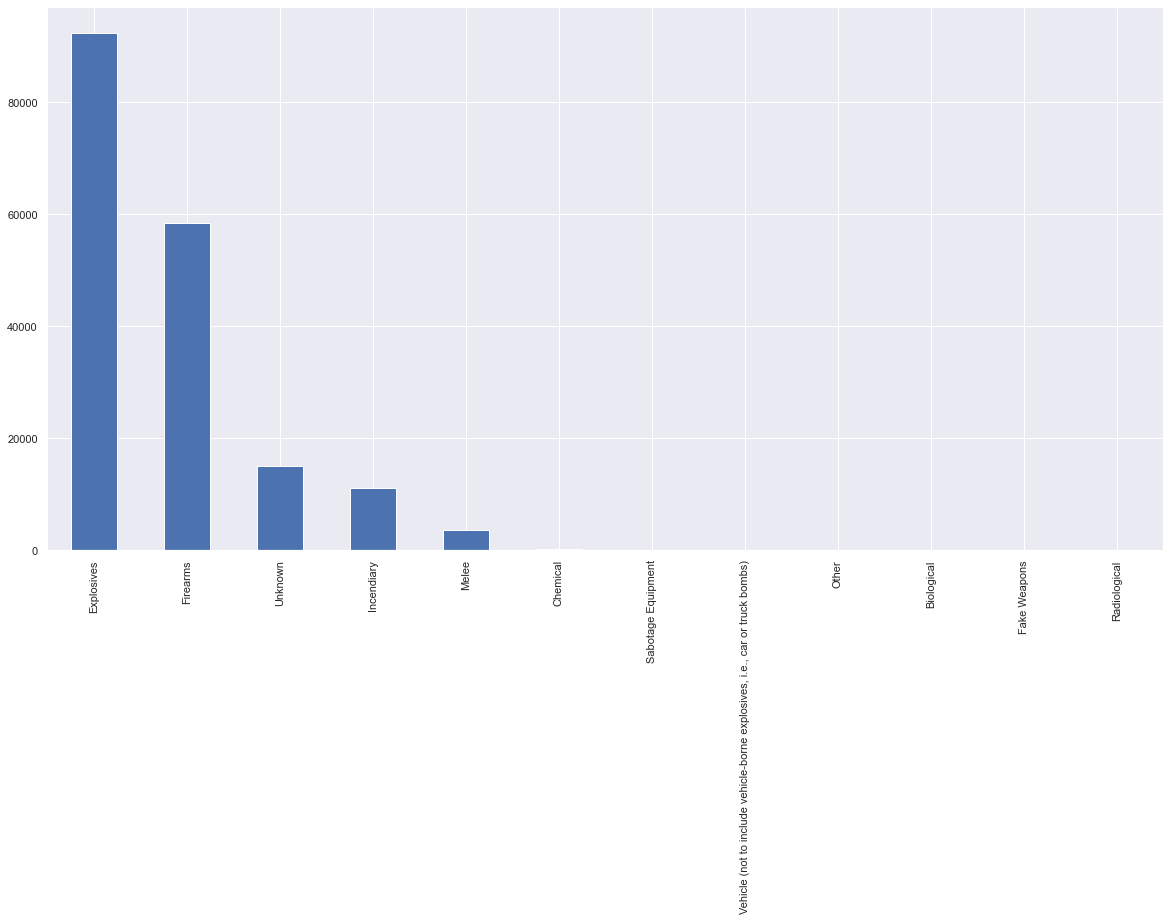

In [38]:
df['Weapon_type'].value_counts().plot.bar()

- In maximum cases Explosives were used for terror attack.

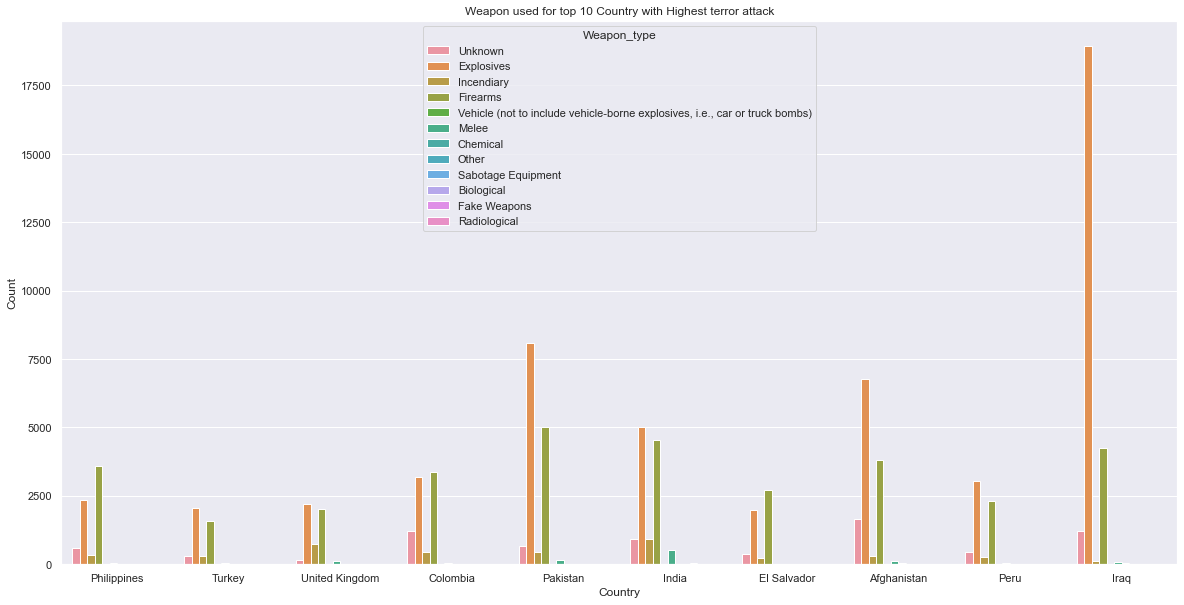

In [39]:
sns.countplot(data=df2,x='Country',hue='Weapon_type')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Weapon used for top 10 Country with Highest terror attack')
plt.show()

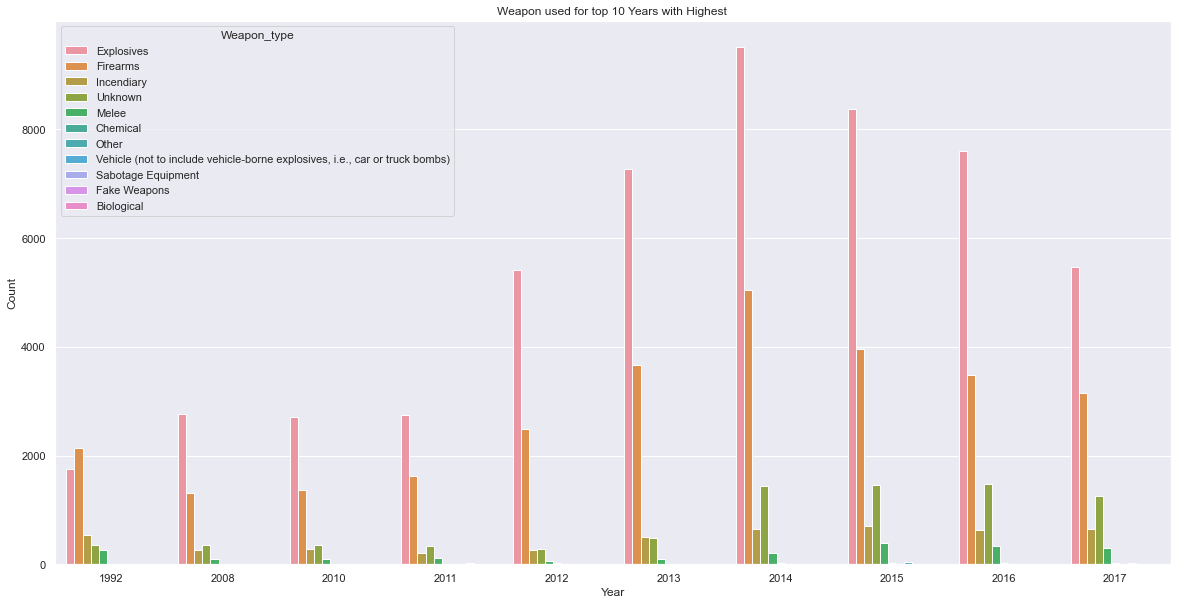

In [40]:
sns.countplot(data=df1, x='Year', hue='Weapon_type')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Weapon used for top 10 Years with Highest ')

plt.show()